In [5]:
import tensorflow as tf 
from tensorflow import keras

In [6]:
print(keras.__version__)

2.2.4-tf


In [7]:
from tensorflow.keras.datasets import mnist

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train[2].shape

(28, 28)

In [11]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [12]:
%matplotlib inline
import matplotlib as mpl

In [13]:
import matplotlib.pyplot as plt

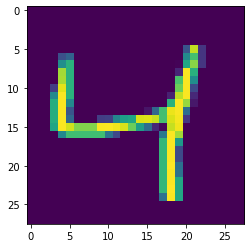

In [14]:
plt.imshow(x_train[2])

In [15]:
y_train[2]

4

In [16]:
x_train, x_test = x_train/255.0, x_test/255.0 #unifying the intensities between 0 and 1

In [17]:
print("Training the model")

Training the model


In [30]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()

model.add(Flatten(input_shape=(28, 28)))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.add(Dense(units=256, activation='relu')) #256 neurons
model.add(Dense(10, activation='softmax')) #10 digits=10 neurons normalize the units 

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
class accuracy99Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.999):
            print("\n\nWe reached 99.9% accuracy!\n")
            self.model.stop_training = True

In [36]:
%%time
# ~ 2 min
model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test), callbacks=[accuracy99Callback()])

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2310 - accuracy: 0.9334 - val_loss: 0.1126 - val_accuracy: 0.9666
Epoch 2/40
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0951 - accuracy: 0.9724 - val_loss: 0.0862 - val_accuracy: 0.9746
Epoch 3/40
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0626 - accuracy: 0.9814 - val_loss: 0.0743 - val_accuracy: 0.9780
Epoch 4/40
60000/60000 [==============================] - 4s 58us/sample - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.0650 - val_accuracy: 0.9807
Epoch 5/40
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0327 - accuracy: 0.9900 - val_loss: 0.0691 - val_accuracy: 0.9792
Epoch 6/40
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0253 - accuracy: 0.9922 - val_loss: 0.0686 - val_accuracy: 0.9801
Epoch 7/40
60000/60000 [==============================]

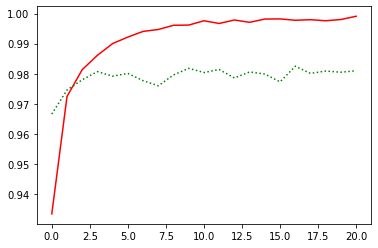

In [37]:
plt.plot(model.history.history['accuracy'], 'r-')
plt.plot(model.history.history['val_accuracy'], 'g:')

In [39]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.1115 - accuracy: 0.9810


[0.11151498842726602, 0.981]

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 4s 98us/sample - loss: 0.4589 - accuracy: 0.8682 - val_loss: 0.2874 - val_accuracy: 0.9206
Epoch 2/10
45000/45000 [==============================] - 4s 92us/sample - loss: 0.2566 - accuracy: 0.9254 - val_loss: 0.2606 - val_accuracy: 0.9235
Epoch 3/10
45000/45000 [==============================] - 4s 92us/sample - loss: 0.2170 - accuracy: 0.9368 - val_loss: 0.2164 - val_accuracy: 0.9381
Epoch 4/10
45000/45000 [==============================] - 4s 93us/sample - loss: 0.1915 - accuracy: 0.9447 - val_loss: 0.2020 - val_accuracy: 0.9422
Epoch 5/10
45000/45000 [==============================] - 4s 96us/sample - loss: 0.1756 - accuracy: 0.9479 - val_loss: 0.2013 - val_accuracy: 0.9429
Epoch 6/10
45000/45000 [==============================] - 4s 99us/sample - loss: 0.1618 - accuracy: 0.9520 - val_loss: 0.1930 - val_accuracy: 0.9449
Epoch 7/10
45000/45000 [==============================] 

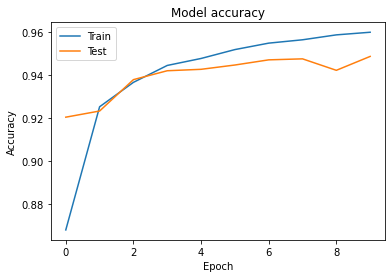

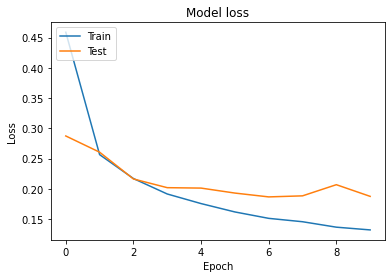

In [42]:
#Data with validaton splitting

import matplotlib.pyplot as plt

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    validation_split=0.25,
                    epochs=10,
                    batch_size=16,
                    verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()